In [1]:
import numpy as np
from matplotlib import pyplot as plt, cm
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# variable declarations

nx = 31
ny = 31
nt = 17
nu = 0.05
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
sigma = 0.25
dt = sigma * dx * dy / nu

x = np.linspace(0,2,nx)
y = np.linspace(0,2,ny)

u = np.ones((nx,ny))
un = np.ones((nx,ny)) #placeholder of solution

# initial condition
u[int(0.5/dx):int(1/dx+1),int(0.5/dy):int(1/dy+1)] = 2

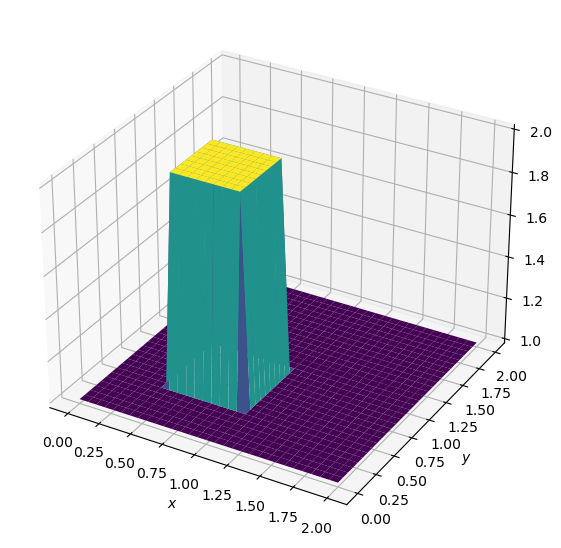

In [3]:
fig = plt.figure(figsize = (11,7), dpi=100)
ax = fig.add_subplot(111, projection='3d')
# The '111' means a grid of 1 row and 1 column and this subplot is the first one.
X, Y = np.meshgrid(x,y)
surf = ax.plot_surface(X,Y,u,cmap=cm.viridis)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$');

In [4]:
# Run through nt timestep

def diffuse(nt):
    u[:,:] = 1
    u[int(0.5/dx):int(1/dx+1),int(0.5/dy):int(1/dy+1)] = 2
    
    for n in range(nt):
        un = u.copy()
        u[1:-1, 1:-1] = (un[1:-1, 1:-1] + 
                        nu * dt / dx**2 *
                        (un[2:,1:-1] - 2 * un[1:-1, 1:-1] + un[0:-2,1:-1]) +
                        nu * dt / dy**2 *
                        (un[1:-1,2:] - 2 * un[1:-1, 1:-1] + un[1:-1,0:-2]))
        u[0,:] = 1
        u[-1,:] = 1
        u[:,0] = 1
        u[:,-1] = 1
    fig = plt.figure(figsize = (11,7), dpi=100)
    ax = fig.add_subplot(111, projection='3d')
    # The '111' means a grid of 1 row and 1 column and this subplot is the first one.
    X, Y = np.meshgrid(x,y)
    surf = ax.plot_surface(X,Y,u,cmap=cm.viridis)
    ax.set_zlim(1, 2.5)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$');

In [19]:
z=[[1,2,12,66,77],[4,5,6,100,99],[7,8,9,1001,12],[10,11,12,312,31],[14,115,16,312,312]]
a=np.array(z)
a

array([[   1,    2,   12,   66,   77],
       [   4,    5,    6,  100,   99],
       [   7,    8,    9, 1001,   12],
       [  10,   11,   12,  312,   31],
       [  14,  115,   16,  312,  312]])

In [34]:

a[-1:,] =60
a

array([[20, 20, 20, 20, 20],
       [30, 40, 40, 40, 30],
       [30, 40, 40, 40, 30],
       [30, 40, 40, 40, 30],
       [60, 60, 60, 60, 60]])